Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, the dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, we will be working with some auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [1]:
!pip install plotly

In [2]:
!pip install feature_engine

In [3]:
!pip install wikipedia

In [4]:
!pip install chart_studio

Importing the required libraries:

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

Importing the dataset:

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

# looking for the dataset
pd.set_option('display.max_columns', None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


By looking at the dataset, we found that in the columns 'collision_type', 'property_damage', and 'police_report_available' contains ? as values in some rows. We can say that the null values values is denoted by ? in this dataset. So, we will treat ? as missing values and replace it with NaN to check for the null values in the dataset.

In [7]:
# Replacing ? with NaN in the columns 'collision_type', 'property_damage', and 'police_report_available'

df['collision_type'] = df['collision_type'].replace({'?':np.nan})
df['property_damage'] = df['property_damage'].replace({"?":np.nan})
df['police_report_available'] = df['police_report_available'].replace({"?":np.nan})

In [8]:
# Checking for the dataset again:

df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NaN,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NaN,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [9]:
# Checking for the shape of the dataset

df.shape

(1000, 40)

i)The dataset contains 1000 rows and 40 cloumns including the target column.

ii)The target column is 'fraud_reported'.

In [10]:
# Looking for the columns

df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

The dataset contains following columns:

1.'months_as_customer': Shows the customer relation with the insurance company in months.

2.'age': age of the customer.

3.'policy_number': Policy number of the customer.

4.'policy_bind_date':

5.'policy_state':

6.'policy_csl':

7.'policy_deductable':

8.'policy_annual_premium':

9.'umbrella_limit':

10.'insured_zip':

11.'insured_sex': Gender of the customer

12.'insured_education_level': Education of the customer

13.'insured_occupation': Occupation

14.'insured_hobbies': Hobbies of the customer.
15.'insured_relationship':

16.'capital-gains':

17.'capital-loss':

18.'incident_date':

19.'incident_type':

20.'collision_type':

21.'incident_severity':

22.'authorities_contacted':

23.'incident_state':

24.'incident_city':

25.'incident_location':

26.'incident_hour_of_the_day':

27.'number_of_vehicles_involved':

28.'property_damage':

29.'bodily_injuries':
30.'witnesses':

31.'police_report_available':

32.'total_claim_amount':

33.'injury_claim':

34.'property_claim':

35.'vehicle_claim':

36.'auto_make':

37.'auto_model':

38.'auto_year':

39.'fraud_reported':

40.'_c39'

In [11]:
# Checking for the missing values in the dataset:

df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

i)There are missing values in the columns 'collision_type', 'property_damage', and 'police_report_available'.

ii)Column '_c39 ' is empty. So, we're dropping this column as it is not contributing to the dataset.

Handling the missing values:

In [12]:
# Dropping the '_c39' column as it does not contain any value.

df = df.drop(['_c39'], axis =1)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


'collision_type':
We'll replace the missing values of the coulmn 'collision_type' with the mode value.

In [13]:
# Checking for the value counts of the column 'collision_type'.

df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

As checked the most occuring collision type is Rear Collision, So we'll replace the missing values with 'Rear Collision'

In [14]:
# Replacing the missing values with 'Rear Collision'

df['collision_type'] = df['collision_type'].fillna('Rear Collision')

'property_damage':
We'll replace the missing values of the column 'property_damage with the mode value.

In [15]:
# Checking for the value counts

df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

From the observation, we can say that the most occuring value is NO, so we'll replace the missing values with NO

In [16]:
# Replacing the missing values 

df['property_damage'] = df['property_damage'].fillna('NO')

'police_report_available':
We'll replace the missing values with the mode of the column 'police_report_available'.

In [17]:
# Looking for the value counts

df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

NO is the most occuring value so we'll replace the missing value with 'NO'

In [18]:
# Replacing the missing value of the column 'police_report_available'

df['police_report_available'] = df['police_report_available'].fillna('NO')

In [19]:
# Checking for the dataset again

df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [20]:
# Checking for the missing value again after handling the missing values.

df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [21]:
# Splitting the policy bind date into day, month, and year

df[["day", "Month", "Year"]] = df['policy_bind_date'].str.split("-", expand=True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day,Month,Year
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,27,06,2006
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,06,09,2000
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,05,1990
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,06,06,2014


In [22]:
# Splitting the incident_date column into day, month, and year

df[["incident_day", "incident_month", "incident_year"]] = df['incident_date'].str.split("-", expand = True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day,Month,Year,incident_day,incident_month,incident_year
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,01,2015
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,27,06,2006,21,01,2015
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,06,09,2000,22,02,2015
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,05,1990,10,01,2015
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,06,06,2014,17,02,2015


In [23]:
# Dropping the policy_bind_date column as we have already splitted it into day, month ,and year

df = df.drop(['policy_bind_date', 'incident_date'], axis=1)

df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day,Month,Year,incident_day,incident_month,incident_year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,01,2015
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,27,06,2006,21,01,2015
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,06,09,2000,22,02,2015
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,05,1990,10,01,2015
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,06,06,2014,17,02,2015


In [24]:
# Checking for the datatype of the columns:

df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

From the above observation, we can that the dataset contains follwing datatypes:
Integer
Object
Float

In [25]:
# Checking for the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

i)There is no missing values in the dataset as said earlier.

ii)The dataset contains 21 object datatypes, 17 integer datatype, and 1 float datatype.

iii)'policy_annual_premium' column contains float datatype.

Data Visualization:

In [26]:
# Checking for the values counts of the target column:

df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [27]:
# Calculating percentage of fraud reported claims.

fraud_per = (247/1000)*100

print('The percentage of fraud claims is ',fraud_per)

The percentage of fraud claims is  24.7


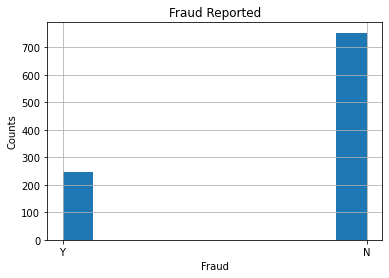

In [28]:
# Plotting graph to show the distribution of 'fraud_reported' column.

df['fraud_reported'].hist(grid=True)
plt.xlabel('Fraud')
plt.ylabel('Counts')
plt.title('Fraud Reported')
plt.show()

i)The above observations, show that the target coulmn is not balanced.
ii)We'll balance the target coulmn later.

In [29]:
# Checking for the value counts of the column 'policy_state'

df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

OH policy state have the highest number and IN policy state have the lowest number.

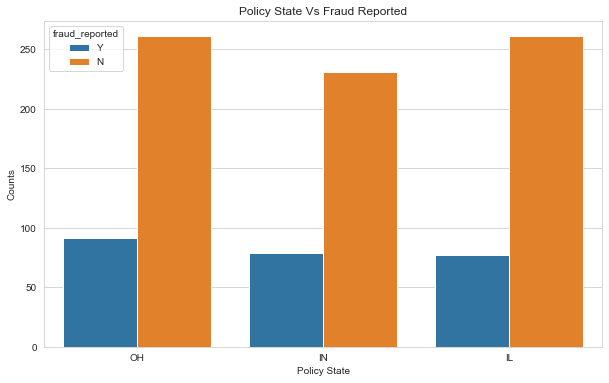

In [30]:
# Showing relation between the target coulmn and 'policy_state' feature column.

plt.figure(figsize=[10,6])
sns.set_style('whitegrid')
sns.countplot(x=df['policy_state'], hue=df['fraud_reported'], data=df)
plt.ylabel('Counts')
plt.xlabel('Policy State')
plt.title('Policy State Vs Fraud Reported')
plt.show()

From the graph, we can say that the fraud claims are almost equal for all the policy states.

In [31]:
# Checking for the value counts of the column 'insured_sex'

df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

Number of females are more than number of males. It means that females are more interested in having insurance than males.

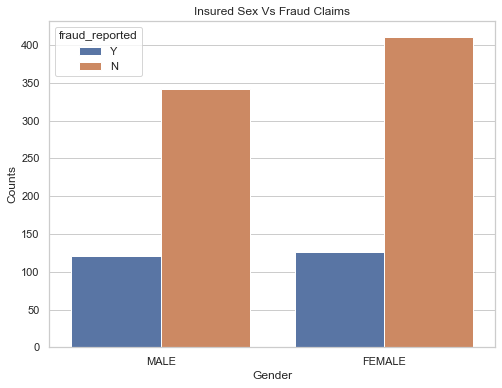

In [32]:
# Showing the relationship between gender and fraud claims

plt.figure(figsize=[8,6])
sns.set_theme(style="whitegrid")
sns.countplot(x=df['insured_sex'], hue=df['fraud_reported'], data=df)
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Insured Sex Vs Fraud Claims')
plt.show()

The number of fraud claims are almost equal for males and females but if we see the total number of insured sex it is more for females. This means that the ratio of fraud claims is more in the case of males as compared to the females.

In [33]:
# Checking for the value count of the coulmn 'insured_education_level'

df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

The maximum number of insured is the person having the education level as JD.

College level persons are least insured.

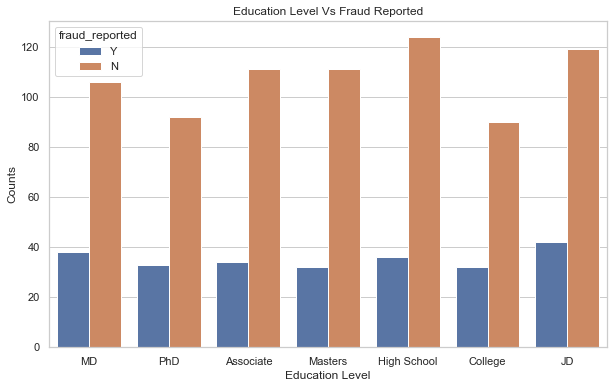

In [34]:
# Showing relationship between the 'insured_education_level' and the target column

plt.figure(figsize=[10,6])
sns.countplot(x=df['insured_education_level'], hue=df['fraud_reported'], data=df)
plt.xlabel('Education Level')
plt.ylabel('Counts')
plt.title('Education Level Vs Fraud Reported')
plt.show()

Maximum fraud claims are done by the persons having the education level as 'JD'

In [35]:
# Checking for the value counts of the column 'insured_occupation'

df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

<AxesSubplot:ylabel='insured_occupation'>

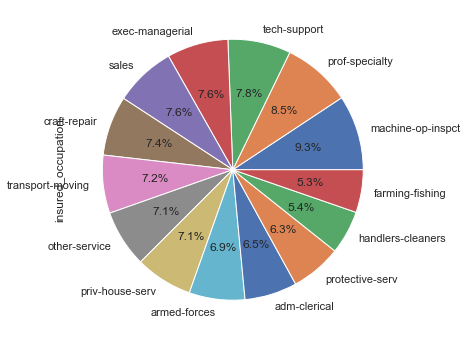

In [36]:
# plotting pie chart to show the distribution of the column 'insured_occupation'
plt.figure(figsize=[6,6])
df['insured_occupation'].value_counts().plot.pie(autopct='%0.1f%%')

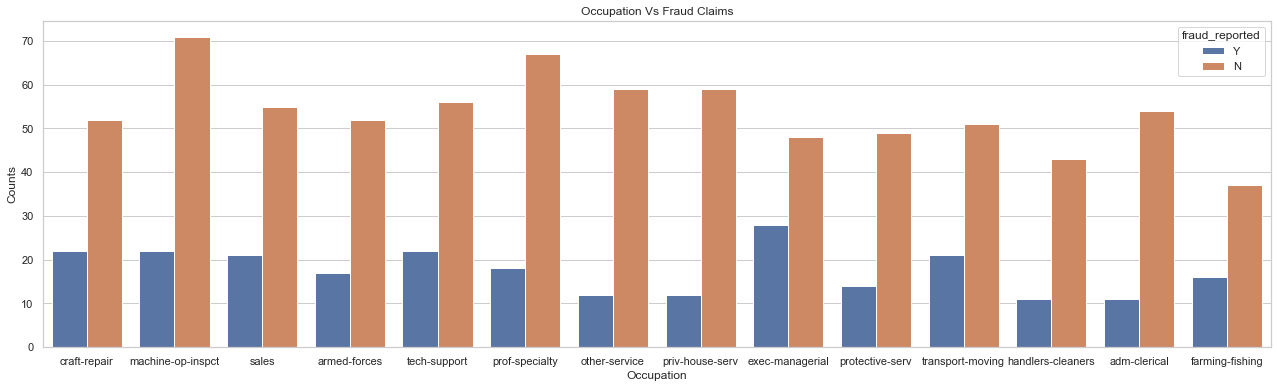

In [37]:
# Checking for the relation between the columns 'insured_occupation' and 'fraud_reported'

plt.figure(figsize=[22,6])
sns.countplot(x=df['insured_occupation'], hue=df['fraud_reported'], data=df)
plt.xlabel('Occupation')
plt.ylabel('Counts')
plt.title('Occupation Vs Fraud Claims')
plt.show()

Observations:
i)machine-op-inspct occupation insured persons have claimed minimum fraud claims.
ii)exec-managerial occupation insured persons have claimed maximum fraud claims.

Let's look on insured hobbies:

In [38]:
# Checking for the value counts

df['insured_hobbies'].value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

<AxesSubplot:ylabel='insured_hobbies'>

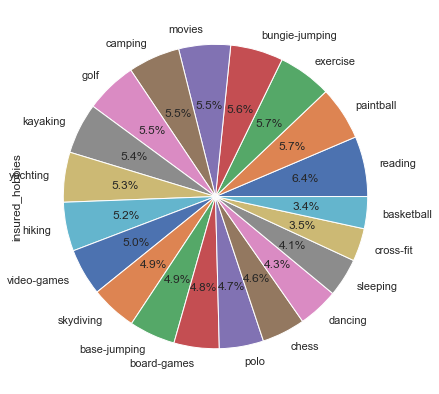

In [39]:
# Let's show it on pie chart

plt.figure(figsize=[7,7])
df['insured_hobbies'].value_counts().plot.pie(autopct='%0.1f%%')

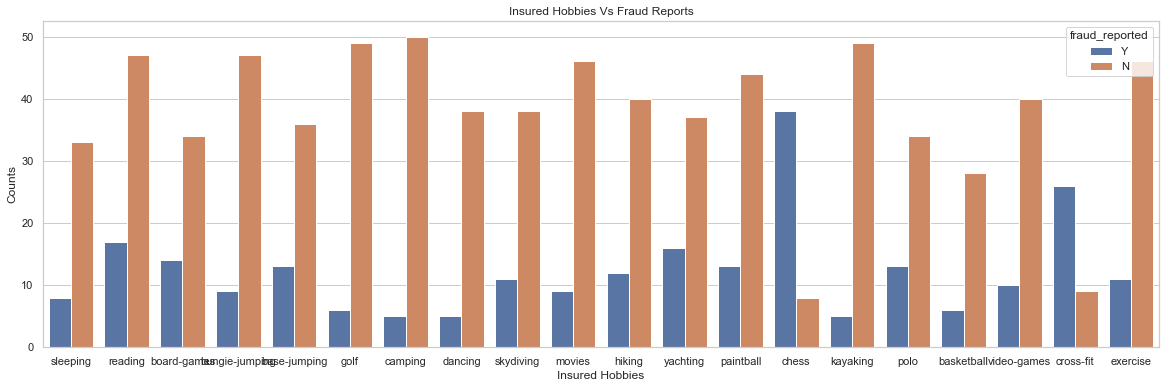

In [40]:
# Let's try to draw some relations between 'insured_hobbies' and 'fraud_reported'

plt.figure(figsize=[20,6])
sns.countplot(x=df['insured_hobbies'], hue=df['fraud_reported'])
plt.xlabel('Insured Hobbies')
plt.ylabel('Counts')
plt.title('Insured Hobbies Vs Fraud Reports')
plt.show()

Persons with the hobbies 'chess' has maximum rate of fraud claims followed by cross-fit.

In [41]:
# Checking for the incident type:

df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

The number of multi vehicle collision is maximum and parked car is minimum.

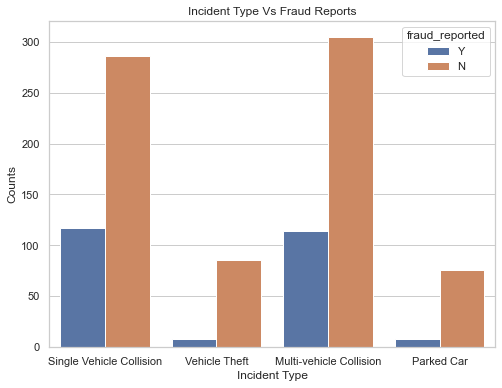

In [42]:
# Checking relation of incident type with fraud claims

plt.figure(figsize=[8,6])
sns.countplot(x=df['incident_type'], hue=df['fraud_reported'], data=df)
plt.xlabel('Incident Type')
plt.ylabel('Counts')
plt.title('Incident Type Vs Fraud Reports')
plt.show()

i)Fraud claims are minimum for parked car and vehicle theft.
ii)In case of multi vehicle collision and single vehicle collision the rate of fraud claims are more.

In [43]:
# Checking for the value counts of the column 'collision_type'

df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

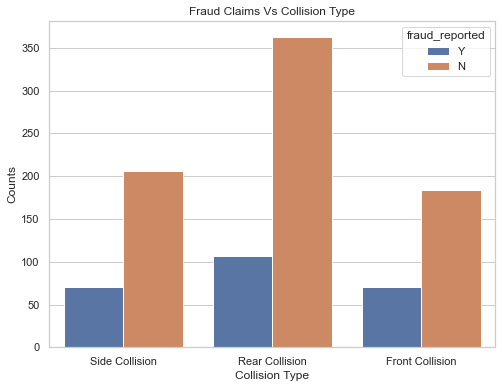

In [44]:
# Checking for the relation between 'collision_type' and 'fraud_reported'

plt.figure(figsize=[8,6])
sns.countplot(x=df['collision_type'], hue=df['fraud_reported'])
plt.xlabel('Collision Type')
plt.ylabel('Counts')
plt.title('Fraud Claims Vs Collision Type')
plt.show()

i)Maximum fraud claims is done is the case of Rear collision.
ii)It is minimum in case of side collision.

In [45]:
# Checking for the value counts of column 'incident_severity'

df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

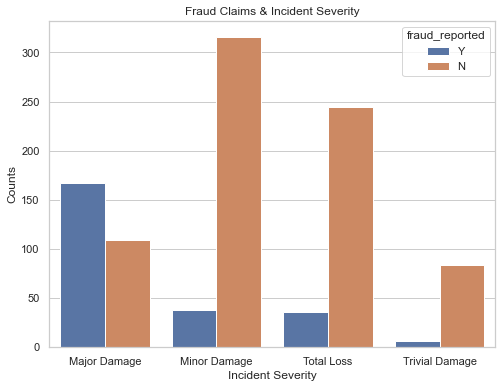

In [46]:
# Checking for the fraud claims and incident severity

plt.figure(figsize=[8,6])
sns.countplot(x=df['incident_severity'], hue=df['fraud_reported'])
plt.xlabel('Incident Severity')
plt.ylabel('Counts')
plt.title('Fraud Claims & Incident Severity')
plt.show()

i)In case of Trivial Damage minimum fraud claims done.
ii)Maximum fraud claims is done in case of major damage.

In [47]:
# Checking for the value counts of the column 'authorities_contacted'

df['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

i)Maximum person have contacted police.
ii)Minimum person have not contacted any authorities.

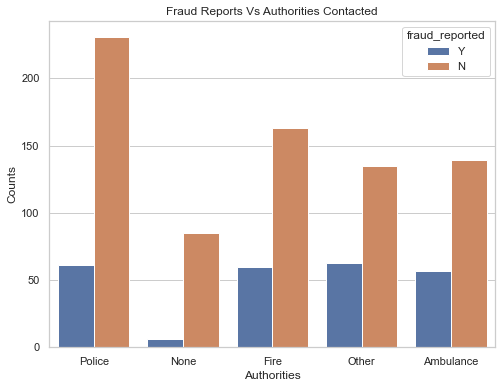

In [48]:
# Let's check for the relation with fraud claims

plt.figure(figsize=[8,6])
sns.countplot(x=df['authorities_contacted'], hue=df['fraud_reported'])
plt.xlabel('Authorities')
plt.ylabel('Counts')
plt.title('Fraud Reports Vs Authorities Contacted')
plt.show()

In [49]:
# Checking for the value counts of column 'incident_state'

df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<AxesSubplot:ylabel='incident_state'>

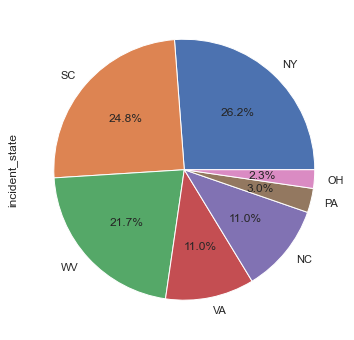

In [50]:
plt.figure(figsize=[6,6])
df['incident_state'].value_counts().plot.pie(autopct='%0.1f%%')

i)Approx 26% incident belong to New york (NY) state.
ii)Approx 25% incident belong to South Carolina (SC) state.
iii)Approx 22% incident belong to West Virginia (WV) state.
iv)Approx 11% incident belong to North Carolina (NC) and Virginia (VA) state each.
v)Approx 3% incident are from Pennsylvania (PA).
vi)Approx 2% incident are from Ohio (OH).

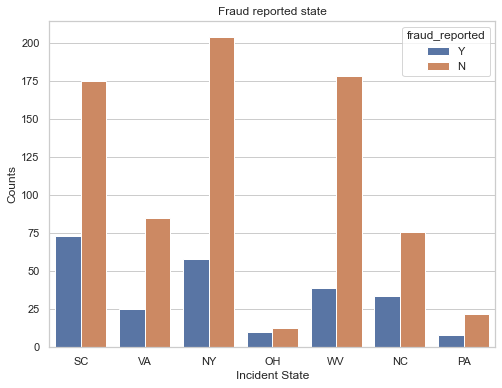

In [51]:
# Checking for the relation with fraud report and states.

plt.figure(figsize=[8,6])
sns.countplot(x=df['incident_state'], hue=df['fraud_reported'])
plt.xlabel('Incident State')
plt.ylabel('Counts')
plt.title('Fraud reported state')
plt.show()

i)Maximum fraud claims are done for the incident from South Carolina (SC) state.
ii)If we talk about the highest rate of fraud claims then it is claimed for the incident from the Ohio (OH) state.

In [52]:
# Checking for the incident_city column

df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

i)The maximum incident take place in Springfield
ii)The minimum incident are reported from the Northbrook city.

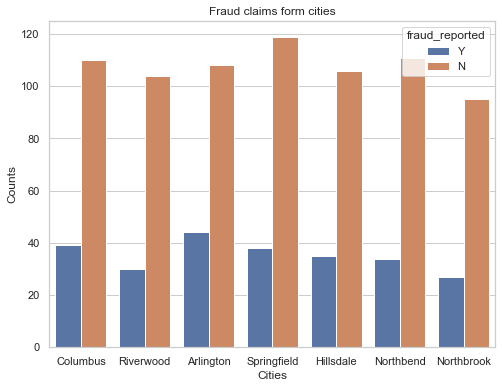

In [53]:
# Checking for the relation of the cities and fraud

plt.figure(figsize=[8,6])
sns.countplot(x=df['incident_city'], hue=df['fraud_reported'])
plt.xlabel('Cities')
plt.ylabel('Counts')
plt.title('Fraud claims form cities')
plt.show()

i)The maximum fraud is reported from Arlington city.
ii)The minimum fraud is reported from Northbrook city.

In [54]:
# Checking for the number of vehicles involved 

df['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

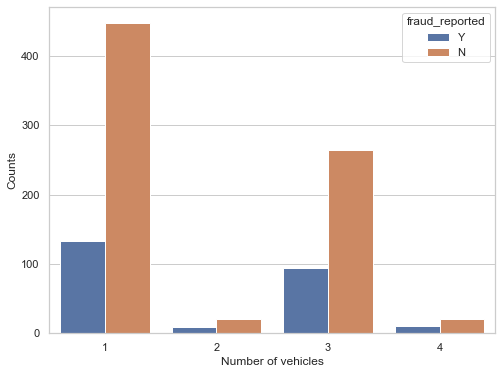

In [55]:
# Checking for the relation between number of vehicles involved and fraud reported

plt.figure(figsize=[8,6])
sns.countplot(x=df['number_of_vehicles_involved'], hue=df['fraud_reported'])
plt.xlabel('Number of vehicles')
plt.ylabel('Counts')
plt.show()

Label Encoding:

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [57]:
# Label encoding of policy_state column

le.fit(df['policy_state'].drop_duplicates())
le.classes_
df['policy_state'] = le.transform(df['policy_state'])

In [58]:
# Label encoding the policy_csl column

le.fit(df['policy_csl'].drop_duplicates())
le.classes_
df['policy_csl'] = le.transform(df['policy_csl'])

In [59]:
# Label encoding the insured_sex column

le.fit(df['insured_sex'].drop_duplicates())
le.classes_
df['insured_sex'] = le.transform(df['insured_sex'])

In [60]:
# Label encoding the insured_education_level

le.fit(df['insured_education_level'].drop_duplicates())
le.classes_
df['insured_education_level'] = le.transform(df['insured_education_level'])

In [61]:
# Label encoding the insured_occupation

le.fit(df['insured_occupation'].drop_duplicates())
le.classes_
df['insured_occupation'] = le.transform(df['insured_occupation'])

In [62]:
# Label encoding the insured_hobbies

le.fit(df['insured_hobbies'].drop_duplicates())
le.classes_
df['insured_hobbies'] = le.transform(df['insured_hobbies'])

In [63]:
# Label encoding the insured_relationship column

le.fit(df['insured_relationship'].drop_duplicates())
le.classes_
df['insured_relationship'] = le.transform(df['insured_relationship'])

In [64]:
# Label encoding the incident_type

le.fit(df['incident_type'].drop_duplicates())
le.classes_
df['incident_type'] = le.transform(df['incident_type'])

In [65]:
# Label encoding the collision_type column

le.fit(df['collision_type'].drop_duplicates())
le.classes_
df['collision_type'] = le.transform(df['collision_type'])

In [66]:
# Label encoding the incident_severity column

le.fit(df['incident_severity'].drop_duplicates())
le.classes_
df['incident_severity'] = le.transform(df['incident_severity'])

In [67]:
# label encoding the authorities_contacted column

le.fit(df['authorities_contacted'].drop_duplicates())
le.classes_
df['authorities_contacted'] = le.transform(df['authorities_contacted'])

In [68]:
# Label encoding the incident_state column

le.fit(df['incident_state'].drop_duplicates())
le.classes_
df['incident_state'] = le.transform(df['incident_state'])

In [69]:
# Label encoding the incident_city column

le.fit(df['incident_city'].drop_duplicates())
le.classes_
df['incident_city'] = le.transform(df['incident_city'])

In [70]:
# Label encoding the incident_location

le.fit(df['incident_location'].drop_duplicates())
le.classes_
df['incident_location'] = le.transform(df['incident_location'])

In [71]:
# Label encoding the property_damage column

le.fit(df['property_damage'].drop_duplicates())
le.classes_
df['property_damage'] = le.transform(df['property_damage'])

In [72]:
# Label encoding the police_report_available column

le.fit(df['police_report_available'].drop_duplicates())
le.classes_
df['police_report_available'] = le.transform(df['police_report_available'])

In [73]:
# Label encoding the auto_make column

le.fit(df['auto_make'].drop_duplicates())
le.classes_
df['auto_make'] = le.transform(df['auto_make'])

In [74]:
# Label encoding the auto_model column

le.fit(df['auto_model'].drop_duplicates())
le.classes_
df['auto_model'] = le.transform(df['auto_model'])

In [75]:
# Label encoding the fraud column

le.fit(df['fraud_reported'].drop_duplicates())
le.classes_
df['fraud_reported'] = le.transform(df['fraud_reported'])

In [76]:
# Let's check the dataset again after label encoding 

df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day,Month,Year,incident_day,incident_month,incident_year
0,328,48,521585,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,2,0,4,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1,17,10,2014,25,01,2015
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,1,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,27,06,2006,21,01,2015
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0,06,09,2000,22,02,2015
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1,25,05,1990,10,01,2015
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0,06,06,2014,17,02,2015


array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_number'}>,
        <AxesSubplot:title={'center':'policy_state'}>,
        <AxesSubplot:title={'center':'policy_csl'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>],
       [<AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'insured_sex'}>,
        <AxesSubplot:title={'center':'insured_education_level'}>,
        <AxesSubplot:title={'center':'insured_occupation'}>],
       [<AxesSubplot:title={'center':'insured_hobbies'}>,
        <AxesSubplot:title={'center':'insured_relationship'}>,
        <AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_type'}>,
        <AxesSubplot:ti

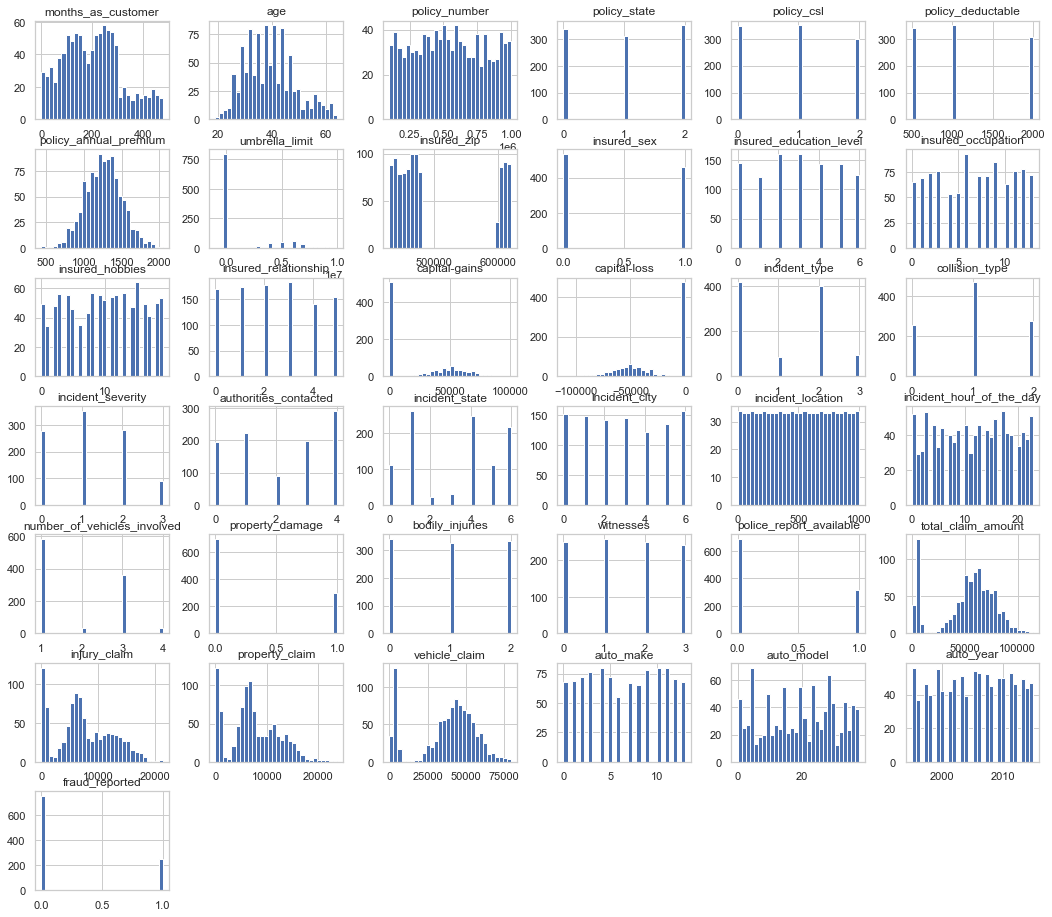

In [77]:
# Plotting the histogram for univariant analysis to check the normal distribution

df.hist(figsize=[18,16], grid=True, layout=(7,6), bins=30)

Checking for the Statistical Summary:

In [78]:
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,1.172000,1.022000,1.184000,2.167000,3.242000,2.966000,499.500000,11.644000,1.83900,0.302000,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,1.081474,0.728043,0.939695,1.532142,2.155942,2.044266,288.819436,6.951373,1.01888,0.459355,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,249.750000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,499.500000,12.000000,1.00000,0.000000,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,2.000000,2.000000,2.000000,4.000000,5.000000,5.000000,749.250000,17.000000,3.00000,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,3.000000,2.000000,3.000000,4.000000,6.000000,6.000000,999.000000,23.000000,4.00000,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


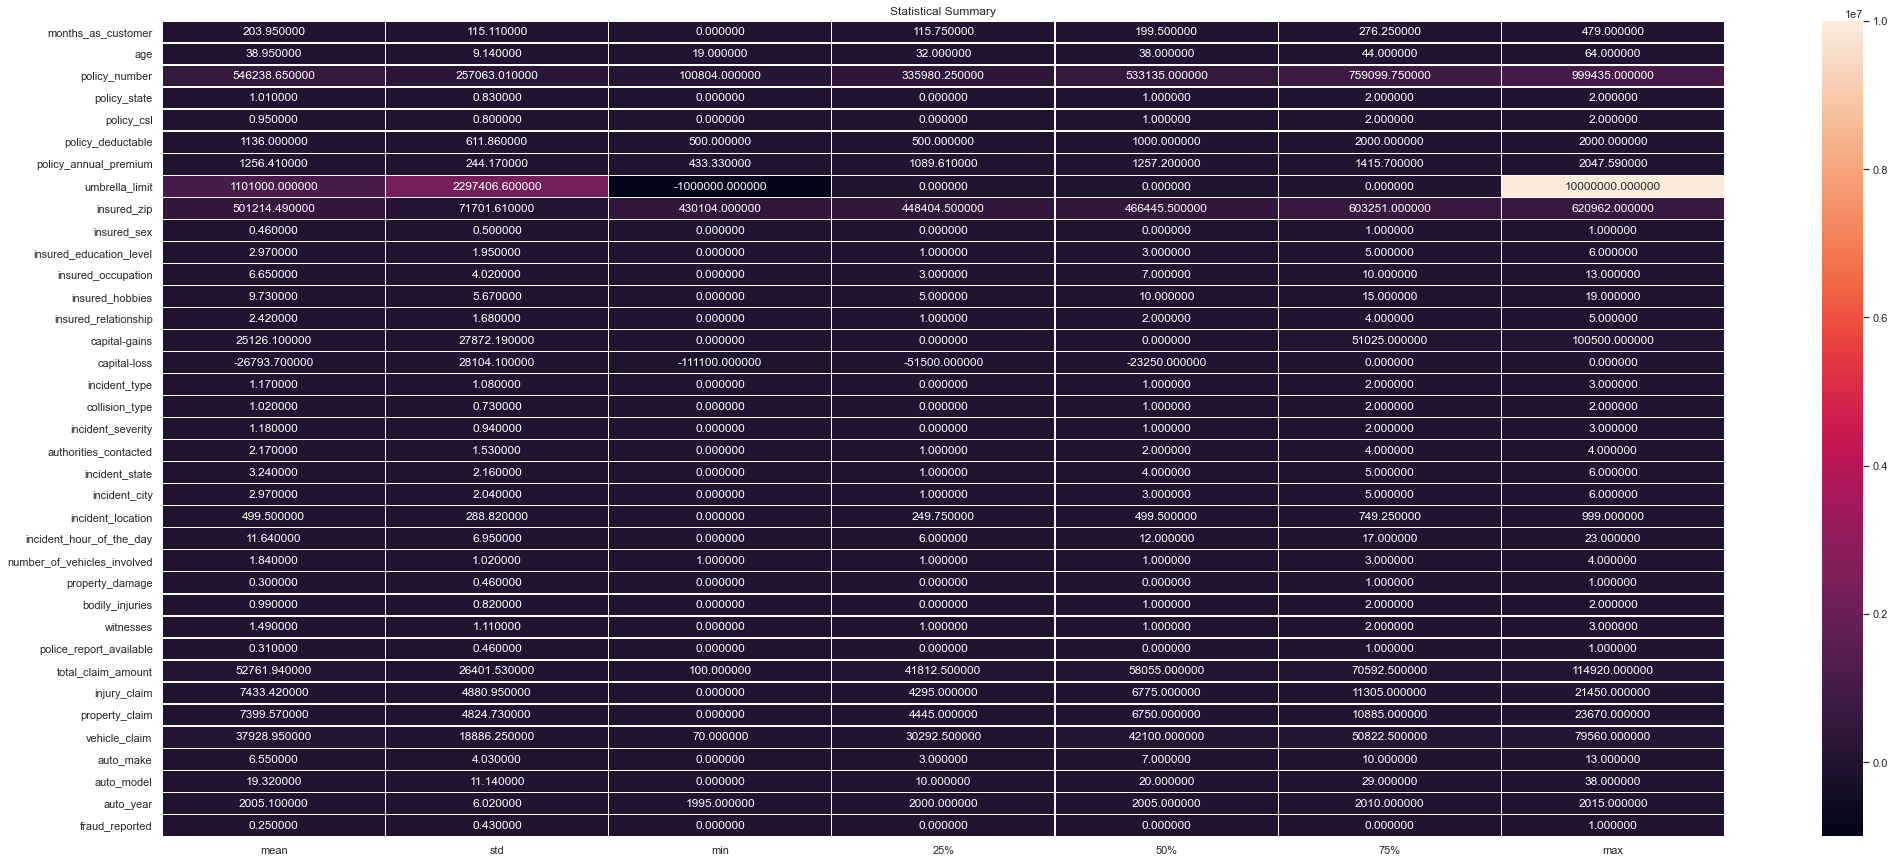

In [79]:
# Plotting Heatmap for Statistical Summary

plt.figure(figsize=[35,15])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Statistical Summary')
plt.show()

Checking for the Correlation of the variables:

In [80]:
df.corr()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,-0.072787,-0.059581,0.010021,0.005369,-0.000130,-0.013630,0.070639,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,-0.075642,-0.058439,0.015417,0.005770,-0.002291,-0.011101,0.087161,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,-0.037264,-0.014422,0.039896,0.017120,0.009802,-0.005669,0.001742,-0.003338,-0.015719,0.018565,-0.010064,-0.035406,0.016393,0.000113,0.013432,-0.019923,-0.004558,-0.012661,0.031190,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,0.052438,-0.026377,-0.016777,0.008723,-0.002077,0.029534,0.029457,-0.042263,-0.008465,0.013384,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,0.011997,0.020641,0.022530,0.056182,0.032814,0.009333,0.047704,-0.001869,-0.019403,-0.027634,-0.000595,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.038411,-0.053912,-0.015711,-0.000760,0.006517,-0.045117,-0.009281,0.060935,0.051214,0.015770,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.036556,-0.011155,-0.055191,0.046434,0.048724,0.017883,-0.001578,-0.045991,0.080738,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,0.015966,0.010041,0.009466,0.029044,-0.077492,0.013094,0.014510,-0.023257,-0.021270,-0.076358,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,-0.069077,0.002106,-0.002355,0.006303,0.049372,-0.010840,-0.016882,-0.023855,-0.017548,-0.047669,-0.017532,-0.013847,0.008274,0.027448,0.023861,0.028695,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,-0.006160,-0.020317,0.002855,-0.

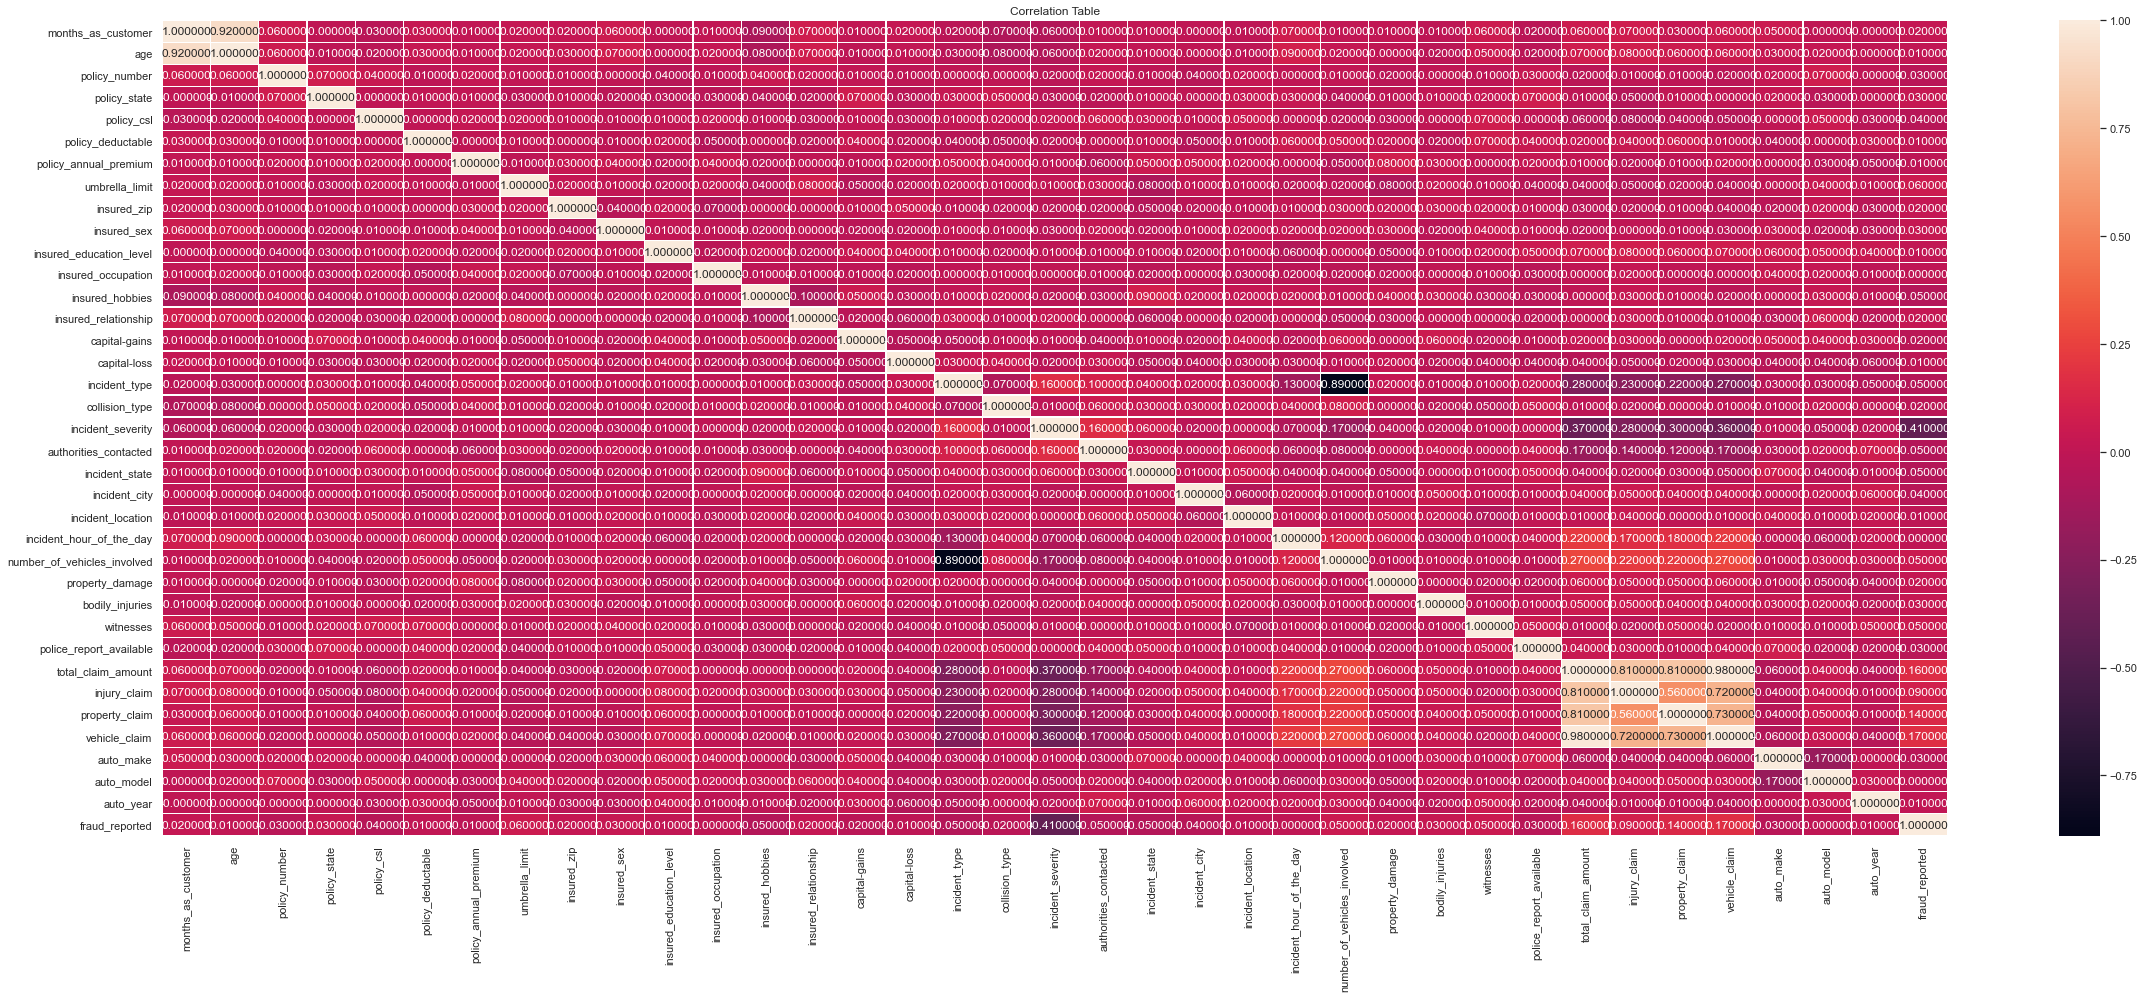

In [81]:
# Plotting heatmap for the correlation table

plt.figure(figsize=[40,15])
sns.heatmap(round(df.corr().transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()

In [82]:
corr_matrix = df.corr()
corr_matrix['fraud_reported'].sort_values(ascending = False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480
capital-loss                  -0.014863


i)The highest correlation is of vehicle_claim column with the target column.
ii)The least correlation with the target column is of incident_severity.

In [83]:
# Splitting the independent and target variables as x and y

x = df.drop(["fraud_reported", "insured_relationship"], axis=1)
y = df['fraud_reported']

Checking for the skewness:

In [84]:
x.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806


Outcome of skewness:
Skewness threshold is taken as +/-0.5.
1.Columns having skewness are:
i)umbrella_limit
ii)insured_zip
iii)property_damage
iv)police_report_available
v)vehicle_claim
We'll remove the skewness using power_transform method.

Removing skewness using power_transform:

In [85]:
from sklearn.preprocessing import power_transform

df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

Checking for the outliers:

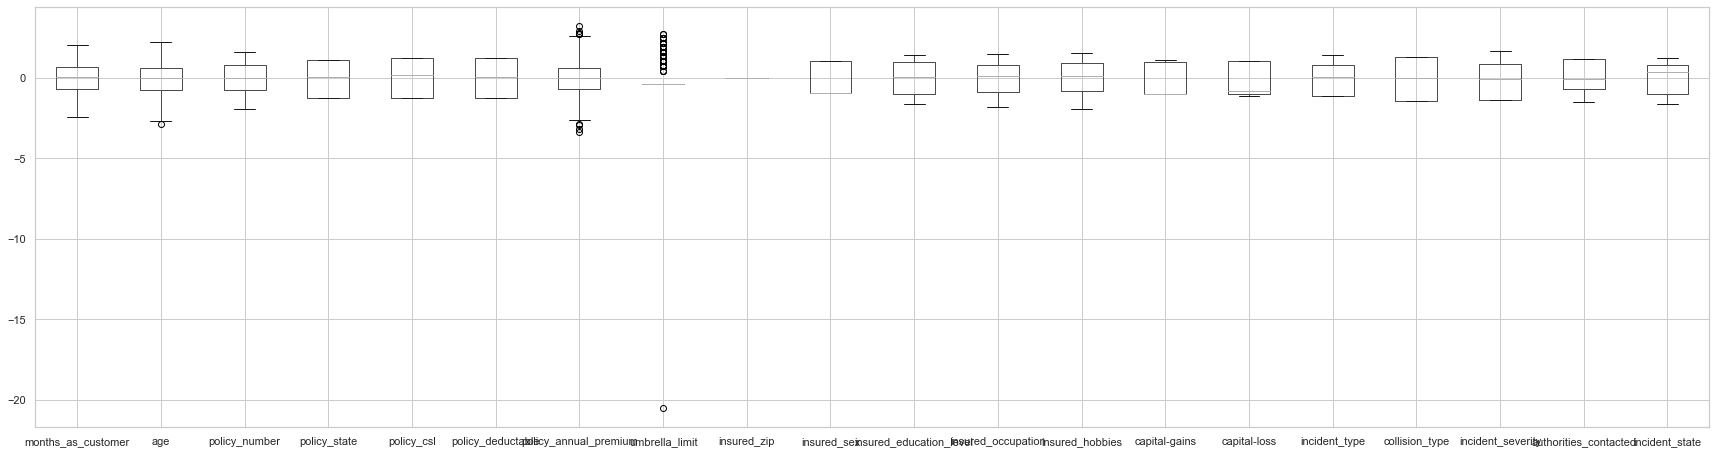

In [86]:
# Plotting boxplot for the first 20 columns 
df_new.iloc[:,0:20].boxplot(figsize=[30,8])
plt.subplots_adjust(bottom = 0.15)
plt.show()

Outliers are present in policy_annual_premium & umbrella_limit columns.

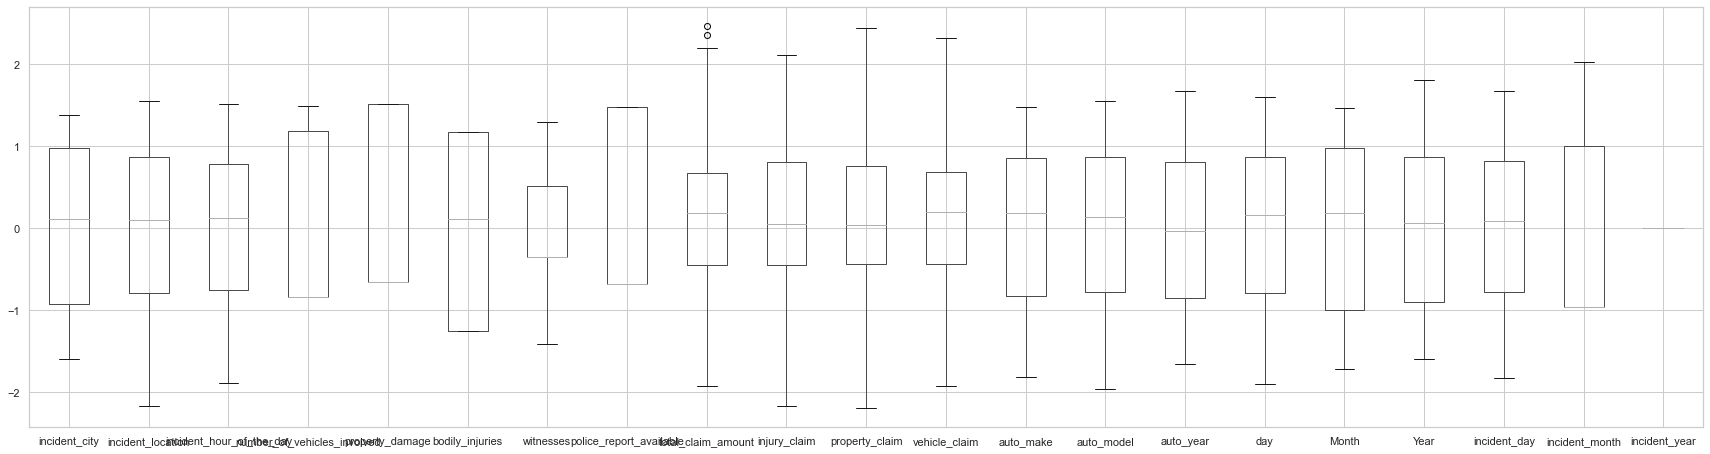

In [87]:
# Plotting boxplot for the rest columns 
df_new.iloc[:,20:43].boxplot(figsize=[30,8])
plt.subplots_adjust(bottom = 0.15)
plt.show()

very few outliers are present in total_claim_amount column.

Handling the class imbalance problem by oversampling the minority class.

In [88]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

x_over, y_over = sm.fit_resample(x, y)

In [89]:
y_over.value_counts()

0    753
1    753
Name: fraud_reported, dtype: int64

We can see now the target column is balanced.

Finding best RandomState:

In [90]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.25,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.6392572944297082  on Random_State  175


Data Preprocessing:

In [91]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over,y_over, test_size=0.25, random_state=157)

Model Training:

 LogisticRegression:

In [92]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

LR.fit(x_train,y_train)
predlr = LR.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.5729442970822282
[[117  75]
 [ 86  99]]
              precision    recall  f1-score   support

           0       0.58      0.61      0.59       192
           1       0.57      0.54      0.55       185

    accuracy                           0.57       377
   macro avg       0.57      0.57      0.57       377
weighted avg       0.57      0.57      0.57       377



From LogisticRegression, we're getting 64% accuracy score.

2. RandomForestClassifier:

In [93]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
predrf = RF.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

0.883289124668435
[[170  22]
 [ 22 163]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       192
           1       0.88      0.88      0.88       185

    accuracy                           0.88       377
   macro avg       0.88      0.88      0.88       377
weighted avg       0.88      0.88      0.88       377



From RandomForestClassifier, we're getting 88% accuracy score.

3. DecisionTreeClassifier:

In [94]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
preddt = DT.predict(x_test)

print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.8090185676392573
[[154  38]
 [ 34 151]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       192
           1       0.80      0.82      0.81       185

    accuracy                           0.81       377
   macro avg       0.81      0.81      0.81       377
weighted avg       0.81      0.81      0.81       377



From DecisionTreeClassifier, we're getting 82% accuracy score.

4. SVC:

In [95]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train, y_train)
predsv = svc.predict(x_test)

print(accuracy_score(y_test, predsv))
print(confusion_matrix(y_test, predsv))
print(classification_report(y_test, predsv))

0.5119363395225465
[[153  39]
 [145  40]]
              precision    recall  f1-score   support

           0       0.51      0.80      0.62       192
           1       0.51      0.22      0.30       185

    accuracy                           0.51       377
   macro avg       0.51      0.51      0.46       377
weighted avg       0.51      0.51      0.47       377



We're getting 54% accuracy score from SVC.

Let's check for the cross validation score:

In [96]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x, y, cv=5)
print("Cross validation score for LogisticRegresssion is ", scr.mean())

Cross validation score for LogisticRegresssion is  0.7499999999999999


In [97]:
scr = cross_val_score(RF, x, y, cv = 5)
print("Cross validation score for RandonForestClassifier is ", scr.mean())

Cross validation score for RandonForestClassifier is  0.78


In [98]:
scr = cross_val_score(DT, x, y, cv =5)
print("Cross validation score for DecisionTreeClassifier is ", scr.mean())

Cross validation score for DecisionTreeClassifier is  0.788


In [99]:
scr = cross_val_score(svc, x, y, cv=5)
print("Cross validation score for SVC is ", scr.mean())

Cross validation score for SVC is  0.7529999999999999


As we checked, we're getting minimum difference between the accuracy score and cross validation score for DecisionTreeClassifier (4.16). So, the best model is DecisionTreeClassifier.

Hyper parameter tuning:

In [100]:
from sklearn.model_selection import GridSearchCV

#DecisionTreeClassifier:
params = {'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}

In [101]:
GCV = GridSearchCV(DecisionTreeClassifier(), params, cv=3)

In [102]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [103]:
# Finding the best parameter found by GridSearchCV

GCV.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}

In [104]:
model = DecisionTreeClassifier(criterion= 'gini', max_depth= 3, min_samples_leaf = 50)
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8567639257294429
[[163  29]
 [ 25 160]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       192
           1       0.85      0.86      0.86       185

    accuracy                           0.86       377
   macro avg       0.86      0.86      0.86       377
weighted avg       0.86      0.86      0.86       377



After hyper parameter tuning we got 88% accuracy score.

AUC ROC Curve:

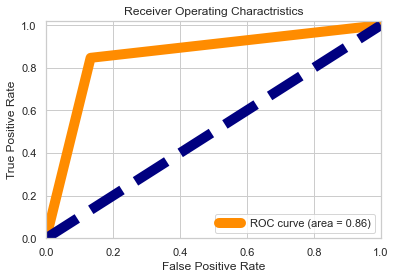

In [105]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color ='darkorange', lw=10, label ='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charactristics')
plt.legend(loc='lower right')

plt.show()

Saving the model:

In [106]:
import pickle
filename = 'insurance_claims_fraud_detection.pkl'
pickle.dump(model, open(filename, 'wb'))

Conclusion:

In [107]:
a = np.array(y_test)
predicted = np.array(model.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
372,0,0
373,1,0
374,1,1
375,1,1
